<h3 style='color:blue'>Exercise: GPU performance for fashion mnist dataset</h3>

This notebook is derived from a tensorflow tutorial here: https://www.tensorflow.org/tutorials/keras/classification
So please refer to it before starting work on this exercise

You need to write code wherever you see `your code goes here` comment. You are going to do image classification for fashion mnist dataset and then you will benchmark the performance of GPU vs CPU for 1 hidden layer and then for 5 hidden layers. You will eventually fill out this table with your performance benchmark numbers


| Hidden Layer | CPU | GPU  |
|:------|:------|:------|
| 1 | ? | ? |
| 5 | ? | ? |

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

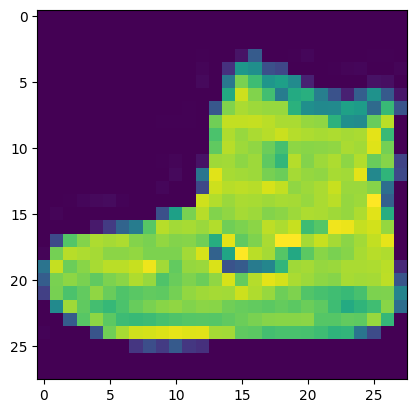

In [6]:
plt.imshow(train_images[0])

In [7]:
train_labels[0]

9

In [8]:
class_names[train_labels[0]]

'Ankle boot'

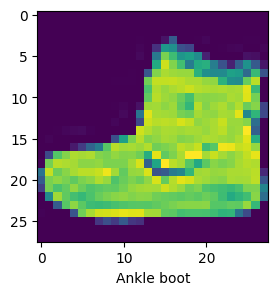

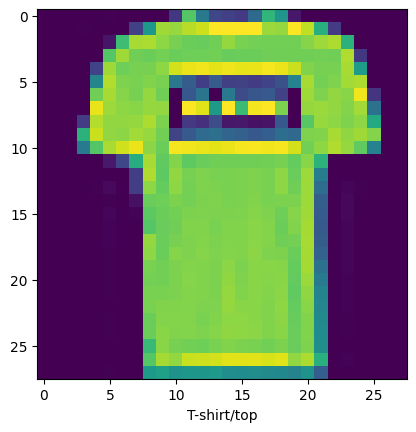

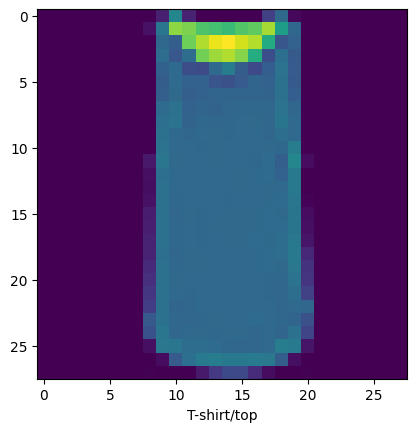

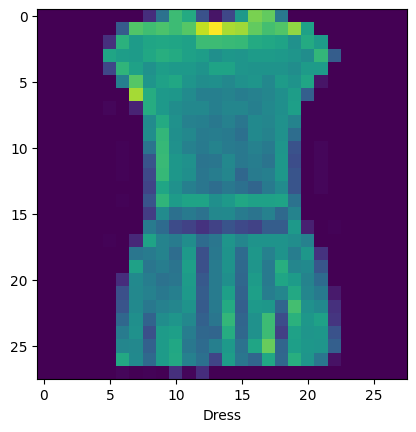

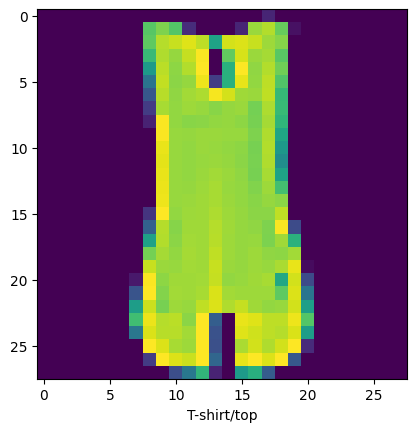

In [9]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [12]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [14]:
def get_model(hidden_layers=1):
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # Your code goes here-----------START
    # Create Flatten input layers
    # Create hidden layers that are equal to hidden_layers argument in this function
    # Create output
    # Your code goes here-----------END

    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer
    layers.append(keras.layers.Dense(10, activation='sigmoid'))

    model = keras.Sequential(layers)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [15]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4758 - accuracy: 0.8296
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3600 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3211 - accuracy: 0.8814
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2974 - accuracy: 0.8899
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2816 - accuracy: 0.8950


In [16]:
model.predict(test_images_scaled)[2]

313/313 [==============================] - 1s 2ms/step


array([6.4730078e-02, 1.0000000e+00, 4.6197696e-05, 4.9794327e-02,
       1.1286761e-03, 4.5828581e-09, 7.5941462e-05, 4.7612405e-16,
       2.9362575e-06, 4.0541800e-10], dtype=float32)

In [17]:
test_labels[2]

1

In [18]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<h4 style="color:purple">5 Epochs performance comparison for 1 hidden layer</h4>

In [21]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    # your code goes here
    with tf.device('/CPU:0'):
        cpu_model = get_model()
        cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4728 - accuracy: 0.8315
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3594 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3213 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2979 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2780 - accuracy: 0.8972
37.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    # your code goes here
    with tf.device('/CPU:0'):
        cpu_model = get_model()
        cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4745 - accuracy: 0.8314
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3607 - accuracy: 0.8685
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3232 - accuracy: 0.8813
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3005 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2793 - accuracy: 0.8960
41.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h4 style="color:purple">5 Epocs performance comparison with 5 hidden layers</h4>

In [24]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    # your code here
     model = get_model(5)
     model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5169 - accuracy: 0.8114
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3905 - accuracy: 0.8605
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3524 - accuracy: 0.8737
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3274 - accuracy: 0.8820
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3093 - accuracy: 0.8876
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    # your code here
     model = get_model(5)
     model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5173 - accuracy: 0.8139
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3888 - accuracy: 0.8592
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3546 - accuracy: 0.8725
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3265 - accuracy: 0.8816
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3124 - accuracy: 0.8862
38.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[Click me to check solution for this exercise](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/10_gpu_benchmarking/Exercise/exercise_solution.ipynb)